<a href="https://colab.research.google.com/github/gaurav4288/Machine_learning/blob/main/30_Outlier_detection_using_percentiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day44-outlier-detection-using-percentiles/weight-height.csv'
df = pd.read_csv(url)

df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

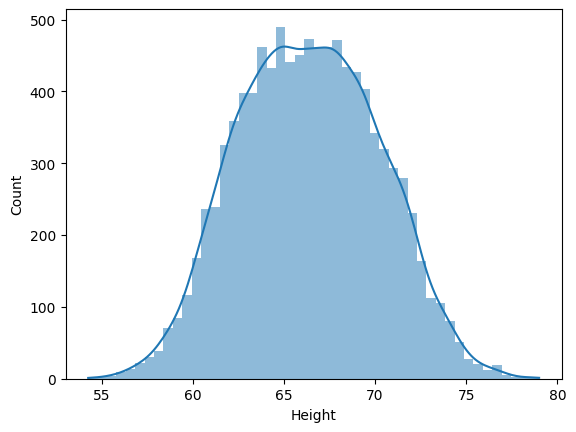

In [11]:
sns.histplot(df['Height'], kde=True, edgecolor=None)
plt.show()

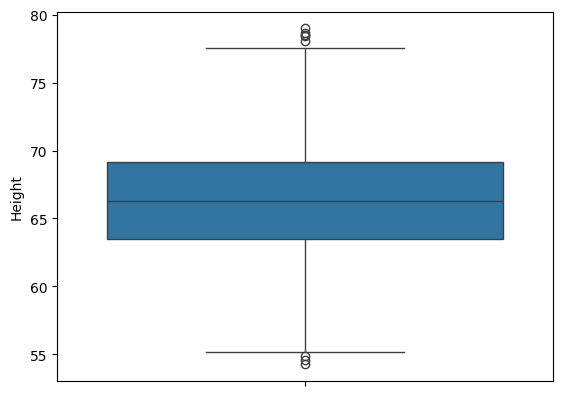

In [13]:
sns.boxplot(df['Height'])
plt.show()

In [17]:
upper_limit = df['Height'].quantile(0.99)

lower_limit = df['Height'].quantile(0.01)

print("upper_limit", upper_limit)
print("lower_limit", lower_limit)


upper_limit 74.7857900583366
lower_limit 58.13441158671655


In [18]:
new_df = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]

In [19]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

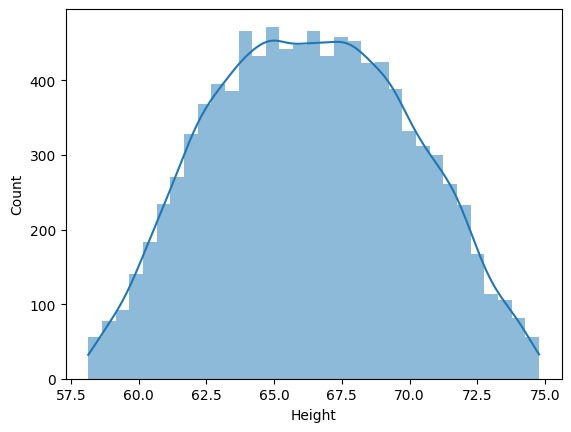

In [21]:
sns.histplot(new_df['Height'], kde=True, edgecolor=None)
plt.show()

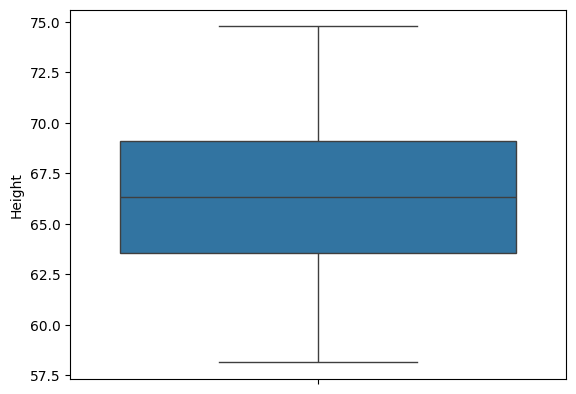

In [22]:
sns.boxplot(new_df['Height'])
plt.show()

In [23]:
# Capping --> Winsorization
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [24]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

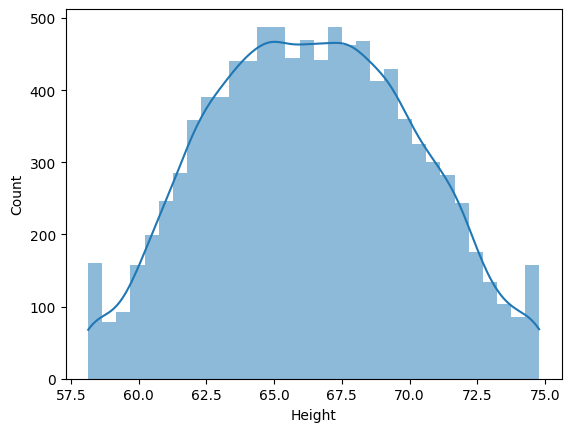

In [25]:
sns.histplot(df['Height'], kde=True, edgecolor=None)
plt.show()

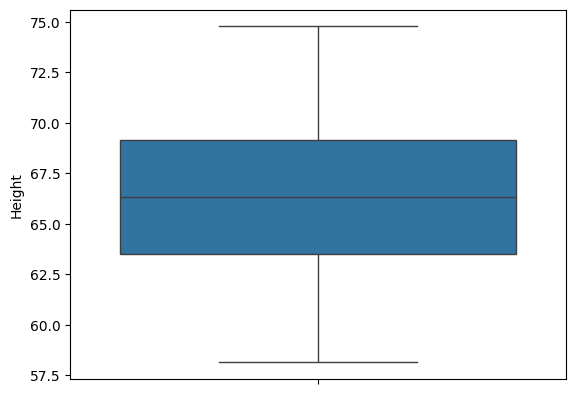

In [26]:
sns.boxplot(df['Height'])
plt.show()